In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [2]:
train_dir = "monkeyData/training/training"
test_dir = "monkeyData/validation/validation"
image_width = 224
image_height = 224
batch = 16

In [3]:
train_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255,
                              rotation_range=30,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              fill_mode='nearest')
test_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

train_data = train_image_generator.flow_from_directory(train_dir, target_size=(image_height,image_width),batch_size=batch,)
test_data = test_image_generator.flow_from_directory(test_dir, target_size=(image_height,image_width),batch_size=batch)

Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.


In [4]:
transfer_model = Sequential()
model = tf.keras.applications.MobileNet(weights='imagenet', include_top=False, 
                    input_shape=(image_height,image_width,3), pooling="avg")
#model.trainable = False
for layer in model.layers:
    layer.trainable = False

In [5]:
model.summary()
transfer_model.add(model)
transfer_model.add(layers.Flatten())
transfer_model.add(layers.Dense(units=512, activation="relu"))
#transfer_model.add(layers.Dense(units=180, activation="relu"))
transfer_model.add(layers.Dense(units=10, activation="softmax"))
transfer_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

 mobilenet_1.00_224 (Functio  (None, 1024)             3228864   
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 512)               524800    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 3,758,794
Trainable params: 529,930
Non-trainable params: 3,228,864
_________________________________________________________________


In [6]:
transfer_model.compile(optimizer="adam", loss="categorical_crossentropy",metrics=['accuracy'])
train_accu_data = transfer_model.fit(train_data,epochs=5,steps_per_epoch=1098//batch)

Epoch 1/5
68/68 [==============================] - 44s 624ms/step - loss: 0.6880 - accuracy: 0.7967
Epoch 2/5
68/68 [==============================] - 42s 613ms/step - loss: 0.1491 - accuracy: 0.9510
Epoch 3/5
68/68 [==============================] - 43s 630ms/step - loss: 0.0964 - accuracy: 0.9686
Epoch 4/5
68/68 [==============================] - 44s 654ms/step - loss: 0.0986 - accuracy: 0.9649
Epoch 5/5
68/68 [==============================] - 42s 616ms/step - loss: 0.0331 - accuracy: 0.9889


In [7]:
transfer_model.evaluate(test_data)

17/17 [==============================] - 9s 479ms/step - loss: 0.1196 - accuracy: 0.9522


[0.119627445936203, 0.9522058963775635]

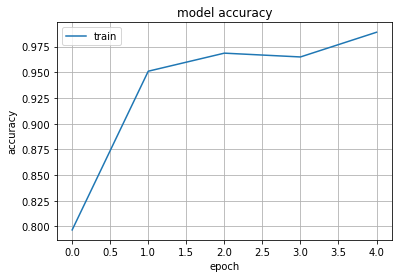

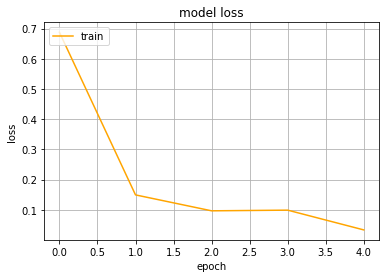

In [8]:
plt.plot(train_accu_data.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.grid()
plt.show()

plt.plot(train_accu_data.history['loss'],color='orange')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.grid()
plt.show()